In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
  return 1/ (1 + np.exp(-z))

z = np.linspace(-5, 5, 200)


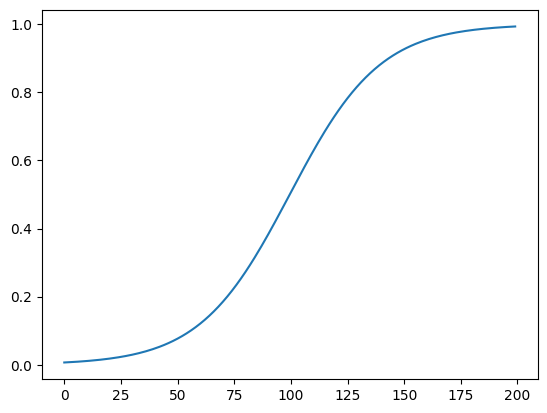

In [ ]:
plt.plot(sigmoid(z))

#Xavier and He Initialization

In [ ]:
import tensorflow as tf
dense = tf.keras.layers.Dense(50, activation = 'relu',
                              kernel_initializer = 'he_normal')

In [ ]:
he_avg_init = tf.keras.initializers.VarianceScaling(scale = 2., mode = 'fan_avg',
                                                    distribution = 'uniform')
dense = tf.keras.layers.Dense(50, activation= 'sigmoid',
                              kernel_initializer = he_avg_init)

#Nonsaturing Activating Function

Leaky Relu

In [ ]:
def leaky_relu(z, alpha):
  return np.maximum(alpha * z, z)

  z = np.linspace(-5, 5, 200)

In [ ]:
leaky_relu = tf.keras.layers.LeakyReLU(alpha = 0.2)
dense = tf.keras.layers.Dense(50, activation = leaky_relu,
                              kernel_initializer = 'he_normal')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, kernel_initializer='he_normal'),      # no activation
    tf.keras.layers.LeakyReLU(negative_slope=0.2)             # activation as a seperate layer
])

ELU

In [ ]:
dense = tf.keras.layers.Dense(50, activation = 'elu',
                              kernel_initializer='he_normal')

SELU

ancaq chox deep neural networklerde istifade olunur, amma dense-den bashqa hech bir layer olmamalidi ve data normalized olmalidi, lecun initializer olmalidi

In [ ]:
dense = tf.keras.layers.Dense(50, activation = 'selu',
                              kernel_initializer='he_normal')

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = [28, 28]))
for layer in range(100):
  model.add(tf.keras.layers.Dense(100, activation = 'selu',
                                  kernel_initializer = 'lecun_normal'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-3), metrics = ['accuracy'])

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train / 255, X_valid / 255, X_test / 255

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-3), metrics = ['accuracy'])

In [ ]:
class_names = ["T-shirt/top",
               "Trousers",
               "Pullover",
               "Dress",
               "Coat",
               "Sandal",
               "Shirt",
               "Sneaker",
               "Bag",
               "Ankle boot"]

In [ ]:
pixel_means = X_train.mean(axis=0, keepdims = True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs = 5,
                    validation_data = (X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 38s 18ms/step - accuracy: 0.4600 - loss: 1.4275 - val_accuracy: 0.6754 - val_loss: 0.8910
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.7204 - loss: 0.7714 - val_accuracy: 0.7724 - val_loss: 0.6593
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.7680 - loss: 0.6372 - val_accuracy: 0.7826 - val_loss: 0.5937
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.7994 - loss: 0.5555 - val_accuracy: 0.8080 - val_loss: 0.5207
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.8224 - loss: 0.5084 - val_accuracy: 0.8044 - val_loss: 0.5425


In [ ]:
tf.random.set_seed(42)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = [28, 28]))
for layer in range(100):
  model.add(tf.keras.layers.Dense(100, activation = 'relu',
                                  kernel_initializer = 'he_normal'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-3),
              metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs = 5,
                    validation_data = (X_valid, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 36s 17ms/step - accuracy: 0.2100 - loss: 2.0102 - val_accuracy: 0.3070 - val_loss: 1.5169
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 39s 16ms/step - accuracy: 0.4077 - loss: 1.2844 - val_accuracy: 0.5864 - val_loss: 0.9835
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.5912 - loss: 0.9570 - val_accuracy: 0.6564 - val_loss: 0.8676
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.6731 - loss: 0.8056 - val_accuracy: 0.6842 - val_loss: 0.8246
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.6307 - loss: 0.9066 - val_accuracy: 0.6742 - val_loss: 0.8109


#GELU, Swish and Mish

In [ ]:
def swish(z, beta = 1):
  return z* sigmoid(beta * z)

def approx_gelu(z):
  return swish(z,beta = 1.702)

def softplus(z):
  return np.log(1 + np.exp(z))


def mish(z):
  return z * np.tanh(softplus(z))

#Batch Normalization

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [ ]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd',
              metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 2, validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7543 - loss: 0.7109 - val_accuracy: 0.8578 - val_loss: 0.3999
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.8562 - loss: 0.4047 - val_accuracy: 0.8686 - val_loss: 0.3655


In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

data activation functiona chatmazdan once normalize olmalidi

Batch Normalization Computer Vision uchun chox yaxsgidi

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7393 - loss: 0.8022 - val_accuracy: 0.8442 - val_loss: 0.4304
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8476 - loss: 0.4374 - val_accuracy: 0.8572 - val_loss: 0.3874


In [ ]:
#Gradient Clipping for RNN

In [ ]:
optimizer = tf.keras.optimizers.SGD(clipvalue=1.0)        # 1den balaca olanlara deymir, ondan boyukleri normalize edir (bir nov learning_rate i azaldir her ikisi)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer)

In [ ]:
optimizer = tf.keras.optimizers.SGD(clipnorm = 1.0)    #butun datani max 1 olmaq sherti ile normalize edir
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer)

#Reusing Pretrained Layers

In [ ]:
pos_class_id = class_names.index("Pullover")
neg_class_id = class_names.index("T-shirt/top")

def split_dataset(X, y):
  y_for_B = (y == pos_class_id) | (y == neg_class_id)
  y_A = y[~y_for_B]
  y_B = (y[y_for_B] == pos_class_id).astype(np.float32)
  old_class_ids = list(set(range(10)) - set([neg_class_id, pos_class_id]))
  for old_class_id, new_class_id in zip(old_class_ids, range(8)):
    y_A[y_A == old_class_id] = new_class_id   # reorder class ids for A
  return ((X[~y_for_B], y_A), (X[y_for_B], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [ ]:
tf.random.set_seed(42)

model_A = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = [28,28]),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(8, activation='softmax')
])

model_A.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])
history = model_A.fit(X_train_A, y_train_A, epochs = 20,
                      validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5208 - loss: 1.5924 - val_accuracy: 0.7949 - val_loss: 0.6840
Epoch 2/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8067 - loss: 0.6330 - val_accuracy: 0.8366 - val_loss: 0.5039
Epoch 3/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8456 - loss: 0.4894 - val_accuracy: 0.8581 - val_loss: 0.4303
Epoch 4/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8648 - loss: 0.4226 - val_accuracy: 0.8679 - val_loss: 0.3892
Epoch 5/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8753 - loss: 0.3829 - val_accuracy: 0.8777 - val_loss: 0.3627
Epoch 6/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8828 - loss: 0.3563 - val_accuracy: 0.8839 - val_loss: 0.3440
Epoch 7/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8875 - loss: 0.3371 - val_accuracy: 0.8867 - val_loss: 0.3300
Epoch 8/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8919 - loss: 0.3223 - 

In [ ]:
model_A.save('my_model_A.keras')

In [ ]:
tf.random.set_seed(42)

model_B = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = [28,28]),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_B.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])
history = model_B.fit(X_train_B, y_train_B, epochs = 20,
                      validation_data=(X_valid_B, y_valid_B))
model.evaluate(X_test_B, y_test_B)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.4329 - loss: 0.7120 - val_accuracy: 0.5223 - val_loss: 0.6865
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5403 - loss: 0.6856 - val_accuracy: 0.6261 - val_loss: 0.6656
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6242 - loss: 0.6628 - val_accuracy: 0.7052 - val_loss: 0.6468
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7377 - loss: 0.6419 - val_accuracy: 0.7676 - val_loss: 0.6295
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8061 - loss: 0.6228 - val_accuracy: 0.8022 - val_loss: 0.6136
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8669 - loss: 0.6053 - val_accuracy: 0.8358 - val_loss: 0.5988
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9002 - loss: 0.5891 - val_accuracy: 0.8566 - val_loss: 0.5848
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9071 - loss: 0.5740 - val_accuracy: 0.8754 - val_loss: 0.5715


[3.6344590187072754, 0.38999998569488525]

In [ ]:
model_A = tf.keras.models.load_model("my_model_A.keras")
model_B_on_A = tf.keras.Sequential(model_A.layers[:-1])   #output layeri goturme
model_B_on_A.add(tf.keras.layers.Dense(1, activation='sigmoid'))   # onun yerine bunu elave et

In [ ]:
tf.random.set_seed(42)

In [ ]:
model_A_clone = tf.keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())         #A modelinin clonunu gotururuk ki, B_on_A-i yeniden fit etsek A_nin parametrleri yeniden deyisecek. Ona gore clone yaradiriq ve A modelinin weight-lerini gotururuk

In [ ]:
model_B_on_A = tf.keras.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
for layer in model_B_on_A.layers[:-1]:
  layer.trainable = True

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model_B_on_A.compile(loss='binary_crossentropy', optimizer = optimizer,
                     metrics=['accuracy'])

history = model_B_on_A.fit(X_train_B, y_train_B)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5572 - loss: 0.7180  


In [ ]:
def build_model(seed=42):
  tf.random.set_seed(seed)
  return tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=[28,28]),
      tf.keras.layers.Dense(100, activation='relu',
                            kernel_initializer='he_normal'),
      tf.keras.layers.Dense(100, activation='relu',
                            kernel_initializer='he_normal'),
      tf.keras.layers.Dense(100, activation='relu',
                            kernel_initializer='he_normal'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

def build_and_train_model(optimizer):
    model=build_model()
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,
                  metrics = ['accuracy'])
    return model.fit(X_train, y_train, epochs = 10,
                     validation_data=(X_valid, y_valid))

#Momentum optimization

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3, momentum = 0.9)

In [ ]:
history_sgd = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6754 - loss: 1.0014 - val_accuracy: 0.8218 - val_loss: 0.5049
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8294 - loss: 0.4846 - val_accuracy: 0.8302 - val_loss: 0.4603
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8472 - loss: 0.4314 - val_accuracy: 0.8464 - val_loss: 0.4232
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8582 - loss: 0.4017 - val_accuracy: 0.8542 - val_loss: 0.4042
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8656 - loss: 0.3800 - val_accuracy: 0.8578 - val_loss: 0.3927
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8701 - loss: 0.3631 - val_accuracy: 0.8648 - val_loss: 0.3783
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8755 - loss: 0.3498 - val_accuracy: 0.8660 - val_loss: 0.3710
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8794 - loss: 0.3381 

#Nesterov Accelerated Gradient

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3, momentum = 0.9,
                                    nesterov = True)

In [ ]:
history_nesterov = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6814 - loss: 0.9658 - val_accuracy: 0.8196 - val_loss: 0.5011
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8334 - loss: 0.4809 - val_accuracy: 0.8342 - val_loss: 0.4530
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8507 - loss: 0.4295 - val_accuracy: 0.8392 - val_loss: 0.4303
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8602 - loss: 0.3995 - val_accuracy: 0.8492 - val_loss: 0.4160
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8675 - loss: 0.3776 - val_accuracy: 0.8538 - val_loss: 0.4033
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8717 - loss: 0.3601 - val_accuracy: 0.8550 - val_loss: 0.3944
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8756 - loss: 0.3457 - val_accuracy: 0.8510 - val_loss: 0.3961
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8795 - loss: 0.333

#AdaGrad

In [ ]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate=1e-3)     #her parametr ucun ayri learning_rate yaradir         ama global minimuma chatmir

In [ ]:
history_adagrad = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5422 - loss: 1.3519 - val_accuracy: 0.7634 - val_loss: 0.7059
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7697 - loss: 0.6831 - val_accuracy: 0.7954 - val_loss: 0.5980
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8005 - loss: 0.5942 - val_accuracy: 0.8142 - val_loss: 0.5495
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8129 - loss: 0.5505 - val_accuracy: 0.8236 - val_loss: 0.5213
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8219 - loss: 0.5236 - val_accuracy: 0.8316 - val_loss: 0.5021
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8281 - loss: 0.5047 - val_accuracy: 0.8336 - val_loss: 0.4881
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8327 - loss: 0.4906 - val_accuracy: 0.8368 - val_loss: 0.4771
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8366 - loss: 0.4794 -

#RMSProp

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-3, rho = 0.9)

In [ ]:
history_rmsprop = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7655 - loss: 0.6623 - val_accuracy: 0.8448 - val_loss: 0.4287
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8543 - loss: 0.4026 - val_accuracy: 0.8502 - val_loss: 0.4198
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8686 - loss: 0.3711 - val_accuracy: 0.8594 - val_loss: 0.4012
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8757 - loss: 0.3528 - val_accuracy: 0.8636 - val_loss: 0.4096
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8796 - loss: 0.3457 - val_accuracy: 0.8536 - val_loss: 0.4601
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8817 - loss: 0.3437 - val_accuracy: 0.8622 - val_loss: 0.4440
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8831 - loss: 0.3422 - val_accuracy: 0.8584 - val_loss: 0.4642
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8819 - loss: 0.3401

#Adam Optimization

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3, beta_1 =0.9,  #momentum
                                     beta_2 = 0.999) # RMS_rop
history_adam = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7803 - loss: 0.6273 - val_accuracy: 0.8352 - val_loss: 0.4214
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8593 - loss: 0.3869 - val_accuracy: 0.8446 - val_loss: 0.4162
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8738 - loss: 0.3437 - val_accuracy: 0.8546 - val_loss: 0.3832
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8842 - loss: 0.3155 - val_accuracy: 0.8550 - val_loss: 0.3905
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8900 - loss: 0.2984 - val_accuracy: 0.8600 - val_loss: 0.3841
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8960 - loss: 0.2819 - val_accuracy: 0.8560 - val_loss: 0.3985
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8997 - loss: 0.2712 - val_accuracy: 0.8680 - val_loss: 0.3605
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9035 - loss: 0.258

#Adamax Optimization

In [ ]:
optimizer = tf.keras.optimizers.Adamax(learning_rate = 1e-3, beta_1 = 0.9,
                                      beta_2 = 0.999)
history_adamax = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7587 - loss: 0.7228 - val_accuracy: 0.8292 - val_loss: 0.4614
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8537 - loss: 0.4148 - val_accuracy: 0.8444 - val_loss: 0.4083
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8684 - loss: 0.3689 - val_accuracy: 0.8512 - val_loss: 0.3892
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8786 - loss: 0.3399 - val_accuracy: 0.8534 - val_loss: 0.3771
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8851 - loss: 0.3187 - val_accuracy: 0.8612 - val_loss: 0.3641
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8897 - loss: 0.3021 - val_accuracy: 0.8656 - val_loss: 0.3587
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8954 - loss: 0.2883 - val_accuracy: 0.8660 - val_loss: 0.3521
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9002 - loss: 0.2765

#Nadam

#AdamW Optimization

In [ ]:
optimizer = tf.keras.optimizers.Adam(weight_decay = 1e-5, learning_rate=1e-3,
                                     beta_1 = 0.9, beta_2 = 0.999)
history_adamw = build_and_train_model(optimizer)

In [ ]:
deymez

NameError: name 'deymez' is not defined

#Learning rate scheduling

Power Scheduling

In [ ]:
# DEPRECATED
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01, decay = 1e-4)

In [ ]:
#RECOMMENDED
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate=0.01,
    decay_steps = 10_000,
    decay_rate=0.1,
    staircase=False
)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [ ]:
history_power_scheduling = build_and_train_model(optimizer)

Exponentional Scheduling

#Avoiding Overfitting Through Regularization

In [ ]:
layers = tf.keras.layers.Dense(100, activation = 'relu',
                        kernel_initializer = 'he_normal',
                        kernel_regularizer = tf.keras.regularizers.l2(0.01))

In [ ]:
tf.random.set_seed(42)

In [ ]:
from functools import partial

RegularizedDense = partial(tf.keras.layers.Dense,
                           activation = 'relu',
                           kernel_initializer = 'he_normal',
                           kernel_regularizer = tf.keras.regularizers.l2(0.01))

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(100),
    RegularizedDense(100),
    RegularizedDense(10, activation = 'softmax')

])

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=2e-2)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer,
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs = 2,
                    validation_data = (X_valid, y_valid))

#Dropout

In [ ]:
tf.random.set_seed(42)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dropout(rate = 0.2),
    tf.keras.layers.Dense(100, activation= 'relu',
                          kernel_initializer = 'he_normal'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100, activation = 'relu',
                          kernel_initializer = 'he_normal'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-2,
                                     momentum = 0.9)
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = optimizer,
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10,
          validation_data = [X_valid, y_valid])

Dropout edenden sonra hem train hem test datasini evaluate etmek lazimdir. Chunki accuracy- e baxanda neuronlarin mueyyen hissesine atir,
amma evaluate edende butun neuronlari istifade edir deye overfit edir

In [ ]:
model.evaluate(X_train, y_train), model.evaluate(X_valid, y_valid), model.evaluate(X_test, y_test)

#MC Dropout

In [ ]:
tf.random.set_seed(42)

In [ ]:
y_probas = np.stack([model(X_test, training = True)   #training true  o demekdi ki predict edende butun neyronlari goturmesin, dropout elesin   np.stack  haamisini birlesdirir
                    for sample in range(100)])        #
y_proba = y_probas.mean(axis = 0)

model(X_test) o demekdi ki predictetsin

In [ ]:
model.predict(X_test[:1].round(3))

In [ ]:
y_proba[0].round(3)

In [ ]:
y_std = y_probas.std(axis = 0)
y_std[0].round(3)

In [ ]:
y_pred = y_proba.argmax(axis=1)
accuracy = (y_pred == y_test).sum() / len(y_test)
accuracy

#Max Norm

In [ ]:
dense = tf.keras.layers.Dense(
    100, activation = 'relu', kernel_initializer='he_normal',
    kernel_constraint = tf.keras.constraints.max_norm(1.))

MaxNormDense = partial(tf.keras.layers.Dense,
                       activation='relu', kernel_initializer='he_normal',
                       kernel_constraint=tf.keras.constraints.max_norm(1.0))

tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = [28, 28]),
    MaxNormDense(100),
    MaxNormDense(100),
    tf.keras.layers.Dense(10, activation = 'softmax')
])
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2, momentum = 0.9)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 10,
          validation_data = (X_valid, y_valid))